In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

In [ ]:
def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)

df = pd.read_csv("iris.data", names=['sepal_length', 'sepal_width',
                                     'petal_legth', 'petal_width',
                                     'class'])

In [ ]:
df

,sepal_length,sepal_width,petal_legth,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
saida = df["class"]
saida.head(1)

0    Iris-setosa
Name: class, dtype: object

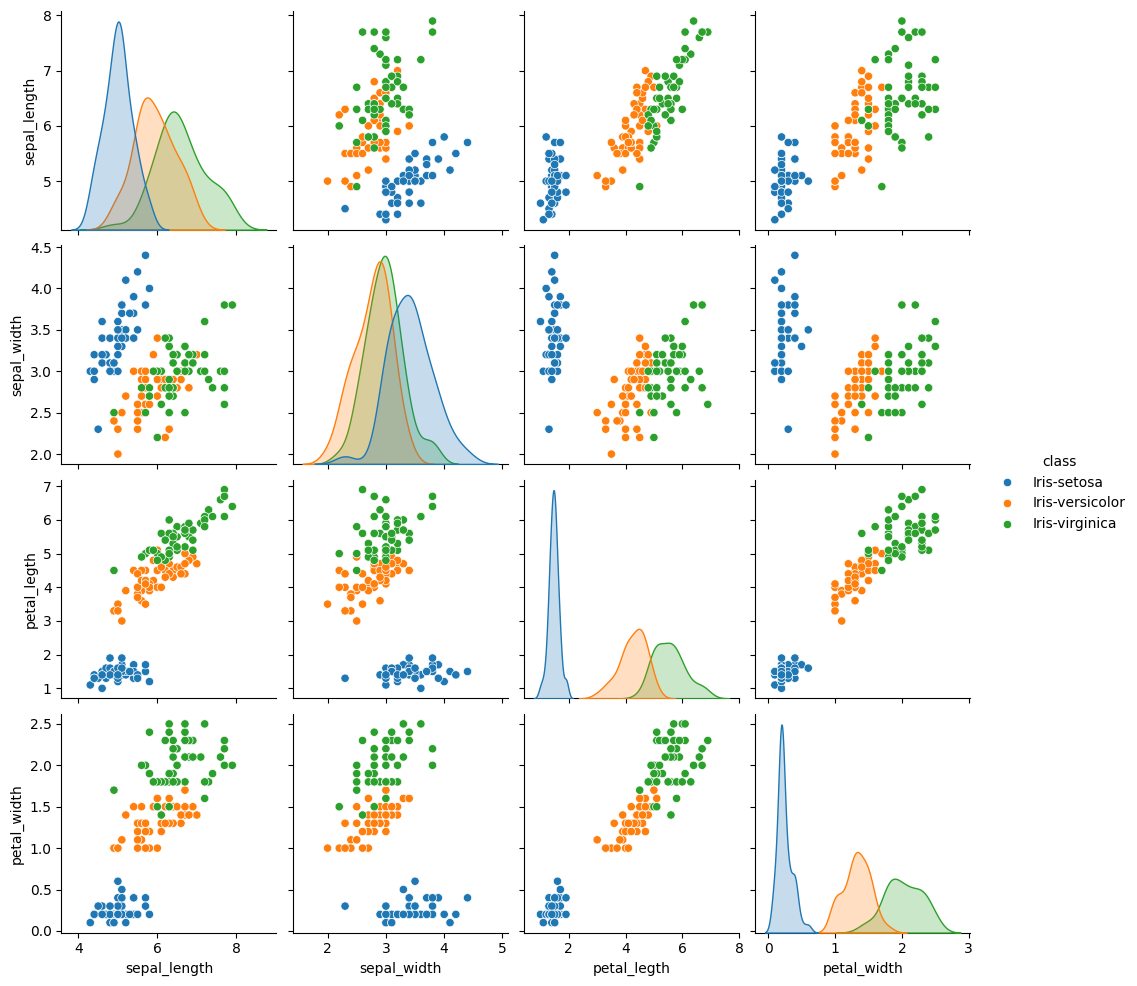

In [ ]:
sb.pairplot(df, hue='class')

In [ ]:
from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [ ]:
entradas = df.drop('class', axis=1)
entradas.head(1)

,sepal_length,sepal_width,petal_legth,petal_width
0,5.1,3.5,1.4,0.2


In [ ]:
for coluna in entradas.columns.to_list():
  if verifica_normalidade(entradas, coluna):
    entradas[coluna] = padronizar(entradas[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    entradas[coluna] = normalizar(entradas[coluna])

A coluna 'sepal_length' não segue uma distribuição normal
A coluna 'sepal_width' não segue uma distribuição normal
A coluna 'petal_legth' não segue uma distribuição normal
A coluna 'petal_width' não segue uma distribuição normal


In [ ]:
!pip install skimpy
from skimpy import skim
skim(entradas)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.0/920.0 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.8/911.8 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver d

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25      ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ sepal_length      │    0 │      0 │   0.43 │   0.23 │    0 │     0.22 │   0.42 │   0.58 │      1 │ ▃▇▇▅▃▁  │  │
│ │ sepal_width       │    0 │      0 │   0.44 │   0.18 │    0 │     0.33 │   0.42 │   0.54 │      1 │ ▂▆▇▆▂▁  │  │
│ │ petal_legth       │    0 │      0 │   0.47 │    0.3 │    0 │      0.1 │   0.57 │   0.69 │      1 │ ▇ ▂▇▆▂  │  │
│ │ petal_width       │    0 │      0 │   0.46 │   0.32 │    0 │    0.083 │    0.5 │   0.71 │      1 │ ▇ ▂▆▅▃  │  │
│ └───────────────────┴──────┴────────┴────────┴────────┴──────┴──────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
df =  np.array(entradas)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
exemplo = np.array(entradas.iloc[[0]])
previsao = kmeans.predict(exemplo)
print(f"Previsão {previsao} valor real: {saida.iloc[0]}")

Previsão [0] valor real: Iris-setosa


In [ ]:
def soma_quadrados_intra_clusters(df):

  wcss = []
  for n in range(2, 21):
    kmeans = KMeans (n_clusters=n)
    kmeans.fit(df)
    wcss.append (kmeans.inertia_)

  return wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'soma dos quadrados intra-clusters')

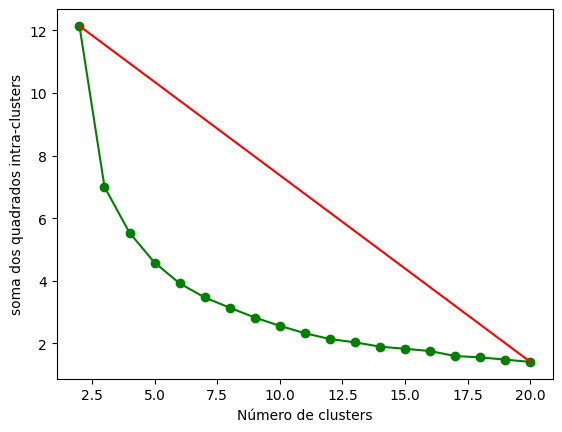

In [ ]:
n_clusters = list(range(2,21))
somas = soma_quadrados_intra_clusters(df)
plt.plot(n_clusters, somas, '-o', color='green')
plt.plot([2,20], [somas[0], somas[-1]], color='red')
plt.xlabel('Número de clusters')
plt.ylabel("soma dos quadrados intra-clusters")

In [ ]:
def numero_otimo_clusters(wcss):
  x0=1
  y0=wcss[0]
  x1=20
  y1=wcss[-1]

  distancias = []

  for i in range(len(wcss)):
    x = i+2
    y = wcss[i]

    numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
    denominador = ((y1-y0)**2 + (x1-x0))**0.5
    distancias.append(numerador/denominador)
  print(distancias)
  return distancias.index(max(distancias))+2

In [ ]:
k = numero_otimo_clusters(somas)
k

[0.9265592397040591, 6.583539011327804, 8.059450350771566, 8.695136074057592, 8.857606700598108, 8.668427680265196, 8.27827635089728, 7.866091062122079, 7.374814868452754, 6.835095686141681, 6.213050409169713, 5.460284296806086, 4.759147148240686, 3.9435337343497094, 3.138306625272576, 2.471436903162992, 1.614708856123381, 0.8075126994577426, 1.5328977188941053e-16]


6